# Workshop 3: How can we slow the spread of antimicrobial resistance?

In Lecture 3 we learned about how resistance spreads. Fundamentally the main driver of resistance is 
antimicrobial usage – if we didn't use antimicrobials at all then resistance would not be spreading. However, antimicrobial usage is essential for treating and preventing infections, so we need to devise clever strategies to minimise the speed of spread of antimicrobial resistance while continuing to use them. In this workshop you will try to design a strategy of this sort.

In the workshop you will run a pre-coded computer model of the spread of antimicrobial resistance in a hospital. This model captures the scenario we discussed in Lecture 3 of the spread of both antimicrobial resistant and antimicrobial susceptible bacteria. Working in groups you will decide on a strategy for which antimicrobials should be deployed where in the hospital based on information available to you on current levels of resistance in the hospital. You will learn how to code this as a function in Python and test if it helps reduce deaths in the hospital compared to baseline antimicrobial usage practices.


#### Intended Learning Outcomes

By the end of this workshop, you should be able to:

* Run simulation models in python and plot their behaviour
* Write your own function in Python
* Iteratively modify and evaluate function code to improve performance


### Working as a group

Your task today is as much conceptual as a coding task. You need to think about what strategy for using antibiotics might help slow the spread of resistance.

**Discuss your code, ideas and answers with other members of the group.** Peer assistance (not copying answers but talking through your approaches to the problem) can help avoid you getting stuck, increase how much you learn from the session and make it more enjoyable.





# Basics of building functions in Python

In order to tell the model for the spread of resistance how to deploy antibiotics you need to build a function that says which antibiotics to use based on So far you've used many functions in this course and in Variation 1 to manipulate, analyse and plot data with Python. However, you do not simply have to rely on functions from the In Python you can create a function using the word `def`. Let's look at a simple example to beign.


In [ ]:
def my_hello_function():
    return "My function says hello!"
my_hello_function()

This piece of code defines a very simple function, which we have names `my_hello_function` that will print the words "My function says hello!" when we call the function. We can now call the function by typing the function name followed by parentheses.


In [ ]:
my_hello_function()

However, generally when we call a function we want to pass something to the function, which it will then modify or use in some way. This information can be passed to the function as arguments. Your function can have as many arguments added to it as you want. Arguments are specified inside the paraentheses after the function name, and should be separated by commas. Let's build a simple function for addition to see how it works.

In [ ]:
def my_addition_function(x,y):
    return x+y

In [ ]:
my_addition_function(9,4)

In this example we have specified two arguments, x and y, which the function will add together, and return the calculated value. What the function should return is indicated with the `return` keyword. We can add further complexity to our function by adding logical conditions to our functions. For example let's imagine we want our function tell us which of x and y are larger.

In [ ]:
def whichlarger_function(x,y):
    if (x>y):
        return "x is larger"
    elif (x<y):
        return "y is larger"
    else:
        return "x and y are equal"


Here the function first asks if x>y using the `if` keyword, and if so it will return the text "x is larger" and the function call ends. We next use the `elif` keyword (shorthand for "else if") to tell the function to evaluate whether x<y, and if so return "y is larger". However, `elif` will only evaluate this when our previous previous `if` statement was not true. Finally, we use the `else` keyword to return "x and y are equal" if neither of our previous statements were true. Let's call this function with a few combinations of numbers to see how it behaves.

In [ ]:
whichlarger_function(2,4)

In [ ]:
whichlarger_function(6,5)

In [ ]:
whichlarger_function(3,3)

Finally, we can also have our functions generate random numbers to allow for variability in their output. To do this we first need to import the `random` module. 

In [ ]:
import random

The random function from this module generates a random number between 0 and 1. We can see how the function works below. Each time you run it it will give you a different random number.

In [ ]:
random.random()

Let's now make a function called `bigger_than_random` that compares a number that we give it to a random number and tells us which is bigger.

In [ ]:
def bigger_than_random(x):
    y=random.random()
    if (x>y):
        return "x is larger"
    elif (x<y):
        return "y is larger"
    else:
        return "x and y are equal"

We can now run this function to ask if a random number between 0 and 1 is bigger or smaller than the number we pass to the function.

In [ ]:
bigger_than_random(0.6)

# Model simulating resistance spread in a hospital

You have been supplied with a computer simulation of the spread of antimicrobial resistance in a hospital. Here are some details about the model:
* In the model there are two different antibiotics that can be used by doctors in the hospital, drug A and drug B.
* The bacteria can have four different types:
    1. Sensitive to both antibiotics (`sensitive`)
    2. Resistant to drug A and sensitive to drug B (`resistant_A`)
    3. Resistant to drug B and sensitive to drug A (`resistant_B`)
    4. Resistant to both drugs (`resistant_AB`).
* Drug A is better at killing the bacteria, helping patients clear their infection twice as fast as drug B when the infecting bacteria are sensitive to it.
* Both drugs carry a cost of resistance for the bacteria.
* The infection is potentially lethal, with each infected patient having a 1% chance of dying each day.
* The model will simulate 5,000 days every time that you run it.
* Each simulation will begin with only sensitive bacteria, but resistance to both drugs will begin to appear by mutation.
* How fast resistance to each drug will spread will depend on how you decide to allocate antibiotics during the simulation.

You task is to write a function that decides each day what proportion of patients should be treated with drug A and what proportion with drug B. **Your ultimate goal here is to minimise the number of deaths that occur during the simulation.**

To get started we'll load the module `AMR_model` that contains the model.

In [1]:
import AMR_model as model

This module contains a function called `run_model`, which will run the computer simulation of the spread of resistance in the hospital. This `run_model` function takes only one input, which is a function that decides **for that day** what proportion of patients (`pA`) should be treated with drug A and what proportion should be treated with drug B (`pB`). We'll call this your **allocation function**. You are given **5 inputs** which must be passed to your allocation function. These are:
   1. The current day of the simulation (`day`)
   2. The prevalence of infections that are sensitive to both antibiotics (`sensitive`)
   3. The prevalence of infections that are resistant to drug A and sensitive to drug B (`resistant_A`)
   4. The prevalence of infections that are resistant to drug B and sensitive to drug A (`resistant_B`)
   5. The prevalence of infections that are resistant to both drugs (`resistant_AB`)
   
Prevalence here is the proportion of patients with that infection.

**Note that `pA` and `pB` must not add up to greater than 1. Otherwise the model will simply not treat any patients at all, so be careful to ensure that this is always the case!**

Let's look at a simple example function to see how this works.

In [25]:
def use_the_bad_drug(day,sensitive,resistant_A,resistant_B,resistant_AB):
    pA=0
    pB=1
    return(pA,pB)


This function simply returns a value for pA of 0, meaning that no patients will recieve drug A (which was the better drug). We can now run simulation with this function and store the results in `results` using the code below.

In [26]:
results=model.run_model(use_the_bad_drug)

We can now import `pandas` and explore the dataframe as usual.

In [ ]:
import pandas
results.head(10)

The columns here give:
* The day in the simulation
* The level of usage of drug A
* The level of usage of drug B
* `sensitive`, `resistant_A`, `resistant_B`, and `resistant_AB` have been explained above.
* And the death rate observed per day per 100,000 patients.

We can now plot this data to see what happened during the simulation.

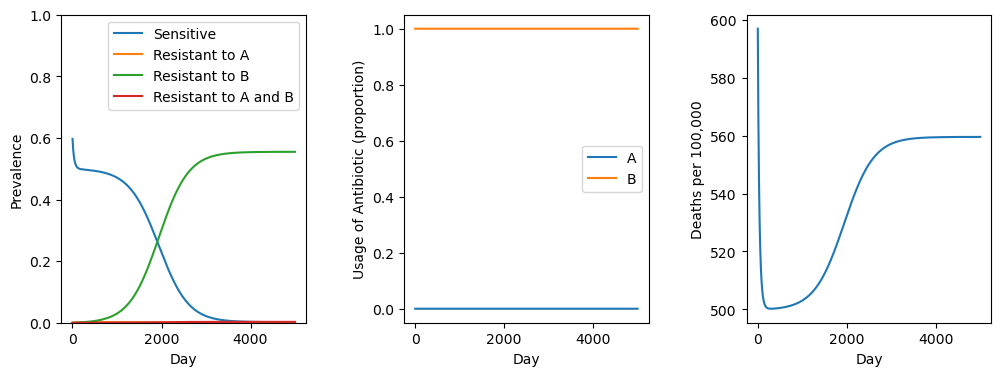

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
plt.plot("day", "sensitive",data=results)
plt.plot("day", "resistant_A",data=results)
plt.plot("day", "resistant_B",data=results)
plt.plot("day", "resistant_AB",data=results)
plt.ylim((0, 1))
plt.xlabel('Day')
plt.ylabel('Prevalence')
plt.legend(['Sensitive', 'Resistant to A', 'Resistant to B', 'Resistant to A and B'])
ax2 = fig.add_subplot(132)
plt.plot("day", "usage_A",data=results)
plt.plot("day", "usage_B",data=results)
plt.xlabel('Day')
plt.ylabel('Usage of Antibiotic (proportion)')
plt.legend(['A', 'B'])
average_deaths=np.mean(results.deaths)
ax3 = fig.add_subplot(133)
plt.plot("day", "deaths",data=results)
plt.xlabel('Day')
plt.ylabel('Deaths per 100,000')
plt.subplots_adjust(wspace=0.4)
plt.show()

We can see here that resistance to drug B quickly appeared and was common within 2000 days. We can also see that deaths initially decreased as we began using the drug, but then increased as resistance increased. We can calculate the total deaths across the simulation by summing `deaths`.

In [28]:
sum(results.deaths)

2684745.377195497

# Task – writing your own function

Now it's your turn to write a function to allocate drugs. Your function is passed information on the current day of the simulation, and the prevalence of each type of bacterial infection. You can use this information in your decisions in the function. For example, you could start using antibiotic A, then switch to antibiotic B after 2500 days.

```Python
def switch_half_way(day,sensitive,resistant_A,resistant_B,resistant_AB):
    if (day<2500):
        pA=1
        pB=0
        return(pA,pB)
    else:
        pA=0
        pB=1
        return(pA,pB)

```

Or we could use A so long as the prevalence of A is lower than some threshold

```Python
def use_A_unless_common(day,sensitive,resistant_A,resistant_B,resistant_AB):
    if (resistant_A<0.3):
        pA=1
        pB=0
        return(pA,pB)
    else:
        pA=0
        pB=1
        return(pA,pB)

```

The possibilities are endless, so use your imagination. Try to think of what would stop resistance to the drugs becoming common, but also save as many patients as possible. **Make sure to discuss your ideas and your code with others in your group!** You can repeatedly modify your function to help improve it. You can use the code given above to **plot your function's consequences** (e.g. plot resistance and deaths over time) and calculate the total deaths that occur in the hospital.

**At the end of the session you should add the code for your function and a short (~150 words) explanation for how it works in your labbook**

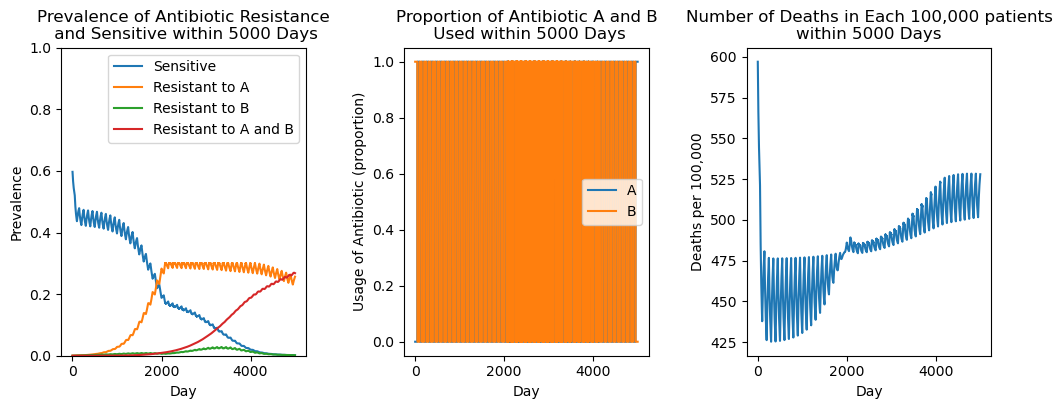

2416668.9385510827

In [1]:
import AMR_model as model
import pandas
import math
import pandas
import matplotlib.pyplot as plt
import numpy as np

def switch_half_way(day,sensitive,resistant_A,resistant_B,resistant_AB):
    if (math.ceil(day/50)%2==0 and resistant_A<0.3):
        pA=1
        pB=0
        return(pA,pB)
    else:
        pA=0
        pB=1
        return(pA,pB)
new_results=model.run_model(switch_half_way)
import pandas
new_results.head(10)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
plt.plot("day", "sensitive",data=new_results)
plt.plot("day", "resistant_A",data=new_results)
plt.plot("day", "resistant_B",data=new_results)
plt.plot("day", "resistant_AB",data=new_results)
plt.ylim((0, 1))
plt.xlabel('Day')
plt.ylabel('Prevalence')
plt.title ('Prevalence of Antibiotic Resistance\n and Sensitive within 5000 Days')
plt.legend(['Sensitive', 'Resistant to A', 'Resistant to B', 'Resistant to A and B'])
ax2 = fig.add_subplot(132)
plt.plot("day", "usage_A",data=new_results)
plt.plot("day", "usage_B",data=new_results)
plt.xlabel('Day')
plt.ylabel('Usage of Antibiotic (proportion)')
plt.legend(['A', 'B'])
plt.title ('Proportion of Antibiotic A and B\n Used within 5000 Days')
average_deaths=np.mean(new_results.deaths)
ax3 = fig.add_subplot(133)
plt.plot("day", "deaths",data=new_results)
plt.xlabel('Day')
plt.ylabel('Deaths per 100,000')
plt.title ('Number of Deaths in Each 100,000 patients\nwithin 5000 Days')
plt.subplots_adjust(wspace=0.4)
plt.show()
sum(new_results.deaths)

## Stewardship of a novel, potential antibiotic
#### This section includes the explanation for the figures above, which was part of the final individual laboratory report. The report as a whole constitutes 45% of the course final mark.

A hospital simulation was run in Python to strategise the antibiotic dosage needed and estimate the outcome within 5000 days operating. Its objectives are to delay AMR spread while saving maximum number of lives with the co-application of two new antibiotics, namely A and B. To complicate the selection pressure, A and B are used alternately every 50 days. However, a condition was set such that the stronger antibiotic, A, is only administered when the AMR prevalence to it is less than 0.3, otherwise only B is given to the patients. When AMR to A is ≥ 0.3, using A would only provide a stronger selective advantage to resistant bacteria, leading them to increase survival and proliferate rapidly. Figure 4 shows this strategy strength; it maintains the prevalence below 0.3 across all AMR types, allowing A and B remain effective for a longer period. Furthermore, death counts seem to steadily oscillate below 500 prior to day 3000 and establish a plateau from day 4000 onwards. The deaths trends indicate that this strategy successfully controls the rise in patients mortality. Despite that, all sensitive bacteria are killed and those resistant to A and B survive and reproduce. Over time, patients infected with bacteria resistant to A and B will dominate the wards, causing treatments effectiveness to reduce. While this strategy helps achieving the aforementioned objectives, it still has many rooms for improvement to minimize the drawbacks.